**Task 7: Dimensionality Reduction & Stock Price Prediction**

Part 1: Dimensionality Reduction

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [8]:
iris=load_iris()
x=iris.data
y=iris.target

In [12]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

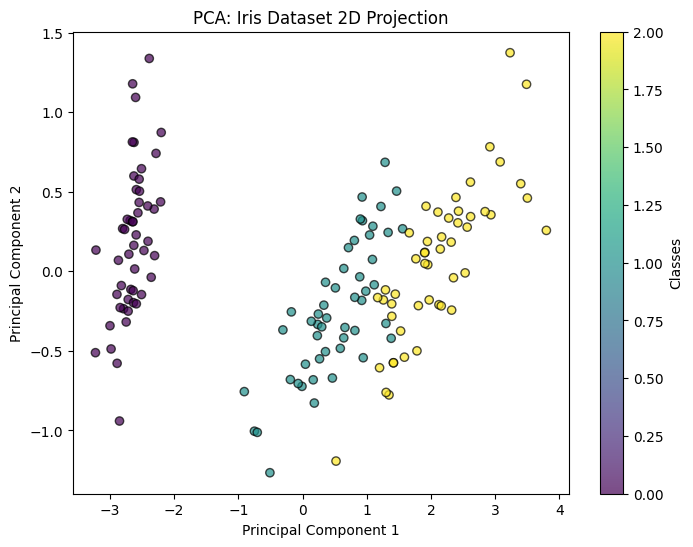

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Iris Dataset 2D Projection")
plt.colorbar(label="Classes")
plt.show()


Part 2: Stock Price Prediction Using Time Series
Forecasting

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [16]:
df = pd.read_csv("stock_prices.csv")


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [18]:
df.fillna(method='ffill', inplace=True)

<ipython-input-18-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


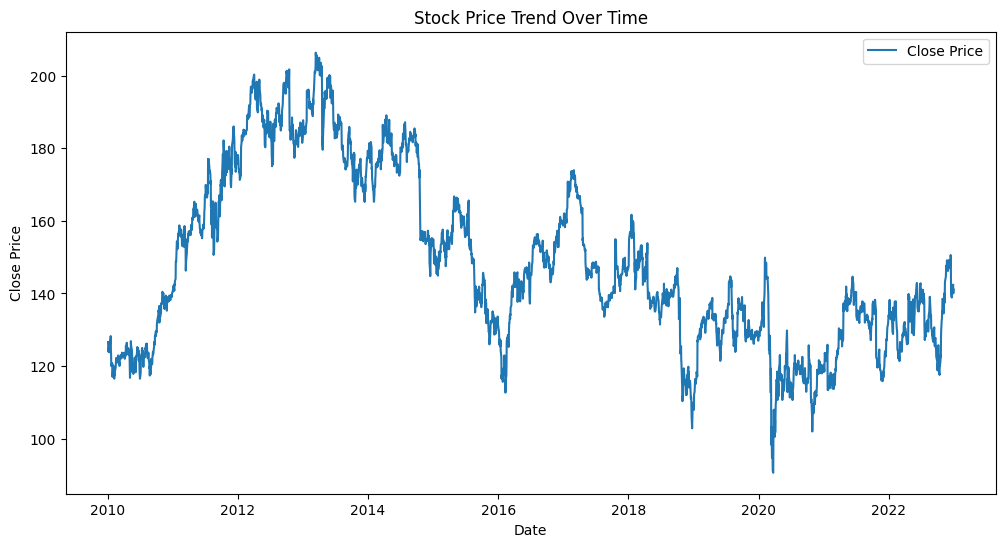

In [19]:

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Price Trend Over Time")
plt.legend()
plt.show()


In [20]:
df['Close_Lag1'] = df['Close'].shift(1)
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df.dropna(inplace=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

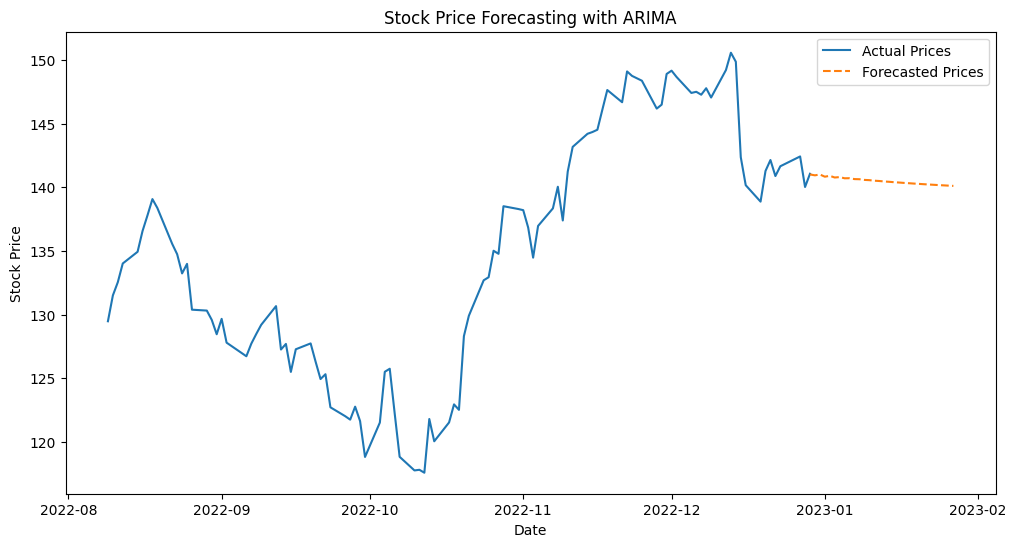

In [21]:
p, d, q = 5, 1, 2
model = ARIMA(df['Close'], order=(p, d, q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # Predict next 30 days

# Plotting actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['Close'][-100:], label="Actual Prices")
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label="Forecasted Prices", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecasting with ARIMA")
plt.legend()
plt.show()


In [22]:
actual = df['Close'][-30:]
predicted = forecast[:30]

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 5.21, RMSE: 6.07
